# H.Ehtasham
# -------------------2017-CS-704----------------------------
# ----------------------------B-----------------------------------

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Import data and analyse data set

In [2]:
data=pd.read_csv('iris.csv')
df=data.copy()

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
df=df.drop(['Id'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [10]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

# Define Features and Target Veriable 

In [12]:
X=df.drop(['Species'],axis=1)
Y=df[['Species']]

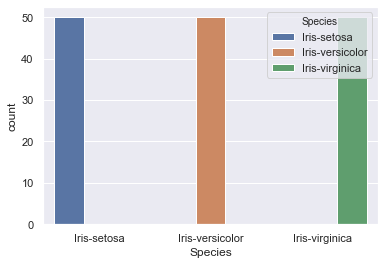

In [13]:
sns.countplot(x='Species',hue='Species',data=df)
plt.show()

In [14]:
#X=df.drop(['Species_Iris-setosa','Species_Iris-versicolor','Species_Iris-virginica'],axis=1)
#Y=df[['Species_Iris-setosa','Species_Iris-versicolor','Species_Iris-virginica']]

In [15]:
#print(X.shape)
#print(Y.shape)

# Split and Train 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=25,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(105, 4) (105, 1)
(45, 4) (45, 1)


In [18]:
xtrain.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
10,5.4,3.7,1.5,0.2
33,5.5,4.2,1.4,0.2
78,6.0,2.9,4.5,1.5
27,5.2,3.5,1.5,0.2
121,5.6,2.8,4.9,2.0


In [19]:
ytrain.head()

,Species
10,Iris-setosa
33,Iris-setosa
78,Iris-versicolor
27,Iris-setosa
121,Iris-virginica


# Import Naive Bayes Model

In [20]:
from sklearn.naive_bayes import GaussianNB


In [21]:
nb_model=GaussianNB()

In [22]:
nb_model.fit(xtrain,ytrain)

C:\Users\Ehtasham\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
ypred=nb_model.predict(xtest)

# Accuray 

In [24]:
from sklearn import metrics

In [25]:
print('Accuracy:',metrics.accuracy_score(ytest,ypred))

Accuracy: 0.9333333333333333


# Classification Report

In [26]:
from sklearn.metrics import classification_report


In [27]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      0.88      0.90        16
 Iris-virginica       0.85      0.92      0.88        12

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



# Test Model

In [28]:
print(nb_model.predict([[5.1,3.5,1.4,0.2]]))  #on existing data

['Iris-setosa']


### On new Data

In [31]:
def test():
        a=float(input('enter sepalLength :'))
        b=float(input('enter sepalWidth :'))
        c=float(input('enter PetalLength :'))
        d=float(input('enter sepalWidth :'))
        print('Specie Class Will Be : ',nb_model.predict([[a,b,c,d]]))
        
test()

enter sepalLength :7.0
enter sepalWidth :3.4
enter PetalLength :5.9
enter sepalWidth :2.3
Specie Class Will Be :  ['Iris-virginica']
